# Non-invasive Sex Identification of T. granosa Using Machine Learning

## Setting up environment

In [1]:
## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
%matplotlib inline

## Preprocessing
from sklearn.preprocessing import MinMaxScaler

## Load and Preprocess Data

In [2]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21.0,28.5,3.05
1,120004,43.1,33.05,28.15,21.0,28.5,3.05
2,130004,43.1,33.05,28.15,21.0,28.5,3.05
3,140004,43.1,33.05,28.15,21.0,28.5,3.05
4,150004,43.1,33.05,28.15,21.0,28.5,3.05
...,...,...,...,...,...,...,...
499,110155,NaN,NaN,NaN,NaN,NaN,NaN
500,120155,NaN,NaN,NaN,NaN,NaN,NaN
501,130155,NaN,NaN,NaN,NaN,NaN,NaN
502,140155,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop rows with NaN values
male_litob = male_litob.dropna()

# Display the updated dataset
male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.10,33.05,28.15,21.0,28.50,3.05
1,120004,43.10,33.05,28.15,21.0,28.50,3.05
2,130004,43.10,33.05,28.15,21.0,28.50,3.05
3,140004,43.10,33.05,28.15,21.0,28.50,3.05
4,150004,43.10,33.05,28.15,21.0,28.50,3.05
...,...,...,...,...,...,...,...
452,120147,38.05,30.05,27.65,20.0,21.05,1.30
453,130147,38.05,30.05,27.65,20.0,21.05,1.30
454,140147,38.05,30.05,27.65,20.0,21.05,1.30
455,150147,38.05,30.05,27.65,20.0,21.05,1.30


In [4]:
male_litob['LW_ratio']= male_litob['Length'] / male_litob['Width']
male_litob['LH_ratio'] = male_litob['Length'] / male_litob['Height']

male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,110004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
1,120004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
2,130004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
3,140004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
4,150004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
...,...,...,...,...,...,...,...,...,...
452,120147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130
453,130147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130
454,140147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130
455,150147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130


In [5]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/female.csv"
female_litob = pd.read_csv(female_url)

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.10
1,20001,48.05,37.60,32.15,20,33.55,4.10
2,30001,48.05,37.60,32.15,20,33.55,4.10
3,40001,48.05,37.60,32.15,20,33.55,4.10
4,50001,48.05,37.60,32.15,20,33.55,4.10
...,...,...,...,...,...,...,...
419,10142,38.50,30.05,26.05,20,20.05,3.05
420,20142,38.50,30.05,26.05,20,20.05,3.05
421,30142,38.50,30.05,26.05,20,20.05,3.05
422,40142,38.50,30.05,26.05,20,20.05,3.05


In [6]:
# Drop rows with NaN values
female_litob = female_litob.dropna()

# Display the updated dataset
female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.10
1,20001,48.05,37.60,32.15,20,33.55,4.10
2,30001,48.05,37.60,32.15,20,33.55,4.10
3,40001,48.05,37.60,32.15,20,33.55,4.10
4,50001,48.05,37.60,32.15,20,33.55,4.10
...,...,...,...,...,...,...,...
420,20142,38.50,30.05,26.05,20,20.05,3.05
421,30142,38.50,30.05,26.05,20,20.05,3.05
422,40142,38.50,30.05,26.05,20,20.05,3.05
423,50142,38.50,30.05,26.05,20,20.05,3.05


In [7]:
# Convert 'Length', 'Width', and 'Height' columns to numeric type
female_litob['Length'] = pd.to_numeric(female_litob['Length'], errors='coerce')
female_litob['Width'] = pd.to_numeric(female_litob['Width'], errors='coerce')
female_litob['Height'] = pd.to_numeric(female_litob['Height'], errors='coerce')

# Now calculate the ratios
female_litob['LW_ratio']= female_litob['Length'] / female_litob['Width']
female_litob['LH_ratio'] = female_litob['Length'] / female_litob['Height']

female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
1,20001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
2,30001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
3,40001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
4,50001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
...,...,...,...,...,...,...,...,...,...
420,20142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927
421,30142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927
422,40142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927
423,50142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927


In [8]:
female_litob['Label'] = 0
male_litob['Label'] = 1

In [9]:
litob_combined = pd.concat([female_litob, male_litob], ignore_index=True)
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,10001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
1,20001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
2,30001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
3,40001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
4,50001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
...,...,...,...,...,...,...,...,...,...,...
877,120147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
878,130147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
879,140147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
880,150147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1


In [10]:
# remove Litob_id column

if 'Litob_id' in litob_combined.columns:
    litob_combined = litob_combined.drop('Litob_id', axis=1)

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
1,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
2,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
3,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
4,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
...,...,...,...,...,...,...,...,...,...
877,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
878,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
879,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
880,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1


In [11]:
# Drop duplicate rows based on all columns
litob_combined = litob_combined.drop_duplicates()

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557,0
6,47.40,32.50,32.25,20.0,33.10,3.05,1.458462,1.469767,0
12,43.30,34.10,31.25,21.0,32.05,4.50,1.269795,1.385600,0
18,50.05,35.05,32.05,21.0,30.05,4.10,1.427960,1.561622,0
24,40.25,33.55,32.40,20.0,29.35,3.40,1.199702,1.242284,0
...,...,...,...,...,...,...,...,...,...
852,52.10,39.40,36.05,19.0,28.05,4.40,1.322335,1.445215,1
858,48.05,34.40,31.90,21.0,28.15,5.70,1.396802,1.506270,1
864,54.40,41.75,35.60,20.0,31.10,3.50,1.302994,1.528090,1
870,44.40,35.35,31.55,22.0,27.20,3.05,1.256011,1.407290,1


### Data Exploration

In [12]:
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']
litob_combined[features].head()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557
6,47.40,32.50,32.25,20.0,33.10,3.05,1.458462,1.469767
12,43.30,34.10,31.25,21.0,32.05,4.50,1.269795,1.385600
18,50.05,35.05,32.05,21.0,30.05,4.10,1.427960,1.561622
24,40.25,33.55,32.40,20.0,29.35,3.40,1.199702,1.242284


In [13]:
from scipy.stats import shapiro, mannwhitneyu

# List of features to test
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

# Alpha level for the test
alpha = 0.05

# Loop through each feature to perform normality and Mann-Whitney U test
for feature in features:
    # Perform Shapiro-Wilk test for normality
    shapiro_test = shapiro(litob_combined[feature])

    # Print the Shapiro-Wilk test results
    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue:.10f}")  # Display with 10 decimal places

    # Interpret the normality test
    if shapiro_test.pvalue > alpha:
        print("Data is normally distributed. Proceeding with independent sample T-test.")
        # If normally distributed, perform an independent sample T-test
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        # Print the results for the T-test (optional)
        print(f"T-test for {feature} not implemented in this code snippet.")
    else:
        print("Data is not normally distributed. Proceeding with Mann-Whitney U test.")
        # Perform Mann-Whitney U test if data is not normally distributed
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        # Perform the Mann-Whitney U test
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')

        # Print the Mann-Whitney U test results
        print(f"Mann-Whitney U Test Statistic: {statistic}")
        print(f"P-value: {p_value:.10f}")

        # Interpret the results
        if p_value > alpha:
            print(f"There is no significant difference between the {feature} of male and female litob.\n")
        else:
            print(f"There is a significant difference between the {feature} of male and female litob.\n")


Feature: Length
Shapiro-Wilk Test Statistic: 0.9284897325508034
P-value: 0.0000008397
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 2220.0
P-value: 0.0361419465
There is a significant difference between the Length of male and female litob.

Feature: Width
Shapiro-Wilk Test Statistic: 0.9526894035775602
P-value: 0.0000584803
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 2472.0
P-value: 0.2550913361
There is no significant difference between the Width of male and female litob.

Feature: Height
Shapiro-Wilk Test Statistic: 0.9495614740691428
P-value: 0.0000320076
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 1865.5
P-value: 0.0005774243
There is a significant difference between the Height of male and female litob.

Feature: Rib count
Shapiro-Wilk Test Statistic: 0.8836546267222907
P-value: 0.0000000019
Data is not normally 

In [14]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu

results = []

# List of features to test
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

# Alpha level for the test
alpha = 0.05

# Loop through each feature to perform normality and Mann-Whitney U test
for feature in features:
    # Perform Shapiro-Wilk test for normality
    shapiro_test = shapiro(litob_combined[feature])

    # Perform Mann-Whitney U test
    male_data = litob_combined[litob_combined['Label'] == 1][feature]
    female_data = litob_combined[litob_combined['Label'] == 0][feature]
    statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')

    # Store results in a dictionary
    result = {
        'Variable Name': feature,
        'Distribution': 'Normal' if shapiro_test.pvalue > alpha else 'Non-normal',
        'Test used': 'Mann-Whitney U test',
        'p-value': p_value,
        'Implication': 'No significant difference' if p_value > alpha else 'Significant difference'
    }
    results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df

,Variable Name,Distribution,Test used,p-value,Implication
0,Length,Non-normal,Mann-Whitney U test,0.036142,Significant difference
1,Width,Non-normal,Mann-Whitney U test,0.255091,No significant difference
2,Height,Non-normal,Mann-Whitney U test,0.000577,Significant difference
3,Rib count,Non-normal,Mann-Whitney U test,0.333161,No significant difference
4,Length (Hinge Line),Non-normal,Mann-Whitney U test,0.020658,Significant difference
5,Distance Umbos,Non-normal,Mann-Whitney U test,0.000874,Significant difference
6,LW_ratio,Non-normal,Mann-Whitney U test,0.026395,Significant difference
7,LH_ratio,Non-normal,Mann-Whitney U test,0.086674,No significant difference


In [15]:
from sklearn.preprocessing import MinMaxScaler

# columns to scale excluding the label
cols_to_scale = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

scaler = MinMaxScaler()

# Fit and transform the selected columns
litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])

# Display the scaled DataFrame
litob_combined

<ipython-input-15-4c19414d8a76>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])


,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,0.373832,0.461728,0.405530,0.6,0.586957,0.089706,0.282637,0.463827,0
6,0.349533,0.209877,0.410138,0.6,0.567391,0.058824,0.595267,0.425835,0
12,0.196262,0.288889,0.364055,0.8,0.521739,0.101471,0.268557,0.296838,0
18,0.448598,0.335802,0.400922,0.8,0.434783,0.089706,0.542448,0.566613,0
24,0.082243,0.261728,0.417051,0.6,0.404348,0.069118,0.147179,0.077190,0
...,...,...,...,...,...,...,...,...,...
852,0.525234,0.550617,0.585253,0.4,0.347826,0.098529,0.359540,0.388205,1
858,0.373832,0.303704,0.394009,0.8,0.352174,0.136765,0.488493,0.481778,1
864,0.611215,0.666667,0.564516,0.6,0.480435,0.072059,0.326047,0.515221,1
870,0.237383,0.350617,0.377880,1.0,0.310870,0.058824,0.244688,0.330081,1


In [16]:
litob_combined.to_csv('litob_combined.csv', index=False)

## Dataset Inspection and Visualizations

In [17]:
litob_combined.columns

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'LW_ratio', 'LH_ratio', 'Label'],
      dtype='object')

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Rib count'}>,
        <Axes: title={'center': 'Length (Hinge Line)'}>,
        <Axes: title={'center': 'Distance Umbos'}>],
       [<Axes: title={'center': 'LW_ratio'}>,
        <Axes: title={'center': 'LH_ratio'}>, <Axes: >]], dtype=object)

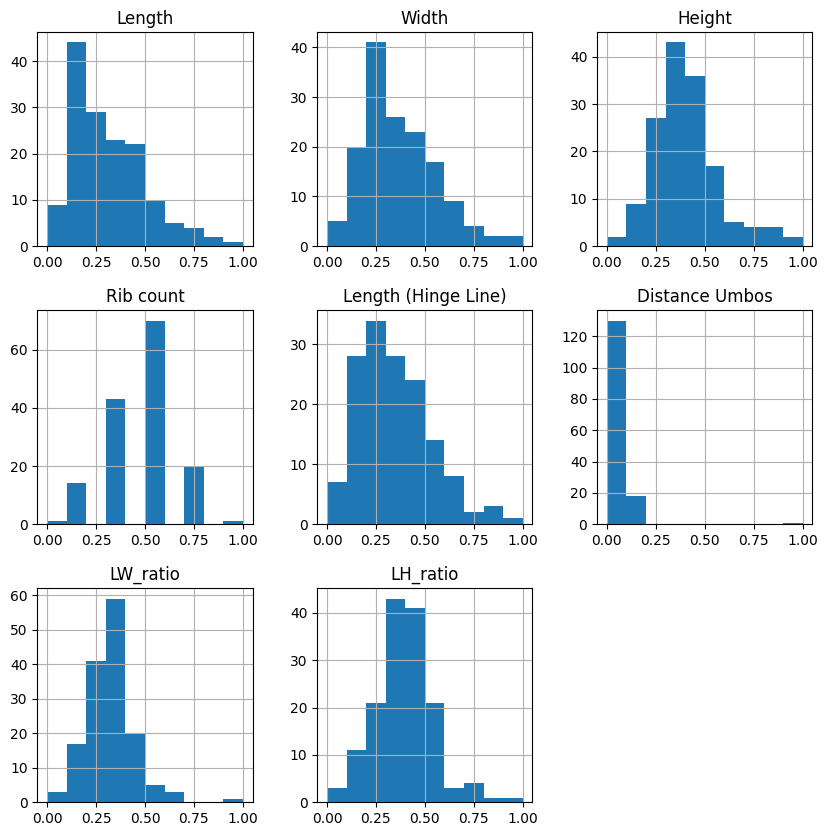

In [18]:
litob_combined_explore = litob_combined.drop(columns=['Label'], errors = 'ignore')
litob_combined_explore.hist(figsize = (10, 10))

In [19]:
litob_combined_explore.describe()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.312363,0.366165,0.403223,0.530201,0.348062,0.064597,0.325917,0.394812
std,0.187137,0.186536,0.165230,0.175416,0.184502,0.083782,0.124916,0.149128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.186916,0.237037,0.297235,0.400000,0.217391,0.032353,0.257188,0.307593
50%,0.252336,0.335802,0.377880,0.600000,0.313043,0.058824,0.321663,0.389291
75%,0.426168,0.483951,0.472350,0.600000,0.478261,0.077941,0.382951,0.473295
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
litob_combined.Label.value_counts()

,count
Label,
1,77
0,72


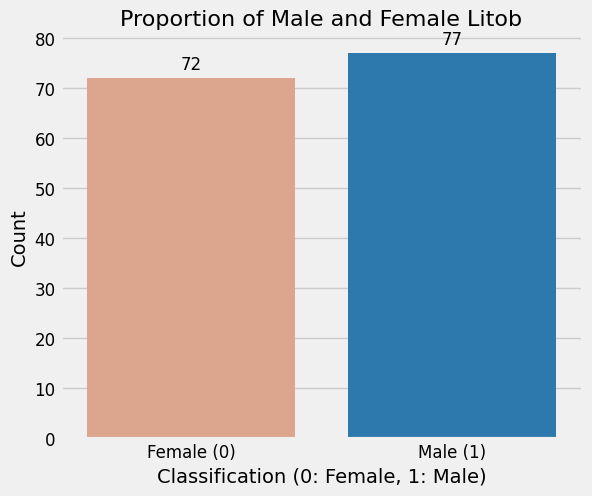

Proportions of Classes:


,count
Label,
1,0.516779
0,0.483221


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))

# Define custom color palette with integer keys
colors = {0: "#e9a080", 1: "#187cc1"}  # Changed keys to integers

# Assign 'Label' to 'hue' and set legend=False
ax = sns.countplot(x='Label', data=litob_combined, hue='Label', palette=colors, legend=False)
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)

# Add count numbers to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),  # Converted to int
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

counts = litob_combined.Label.value_counts()
proportions = counts / counts.sum()
print('Proportions of Classes:')
proportions

In [22]:
litob_features = litob_combined.columns.drop(['Label'])
x = litob_combined[litob_features]
y = litob_combined['Label']

variable_corr = pd.concat([x, y], axis=1)
variable_corr

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,0.373832,0.461728,0.405530,0.6,0.586957,0.089706,0.282637,0.463827,0
6,0.349533,0.209877,0.410138,0.6,0.567391,0.058824,0.595267,0.425835,0
12,0.196262,0.288889,0.364055,0.8,0.521739,0.101471,0.268557,0.296838,0
18,0.448598,0.335802,0.400922,0.8,0.434783,0.089706,0.542448,0.566613,0
24,0.082243,0.261728,0.417051,0.6,0.404348,0.069118,0.147179,0.077190,0
...,...,...,...,...,...,...,...,...,...
852,0.525234,0.550617,0.585253,0.4,0.347826,0.098529,0.359540,0.388205,1
858,0.373832,0.303704,0.394009,0.8,0.352174,0.136765,0.488493,0.481778,1
864,0.611215,0.666667,0.564516,0.6,0.480435,0.072059,0.326047,0.515221,1
870,0.237383,0.350617,0.377880,1.0,0.310870,0.058824,0.244688,0.330081,1


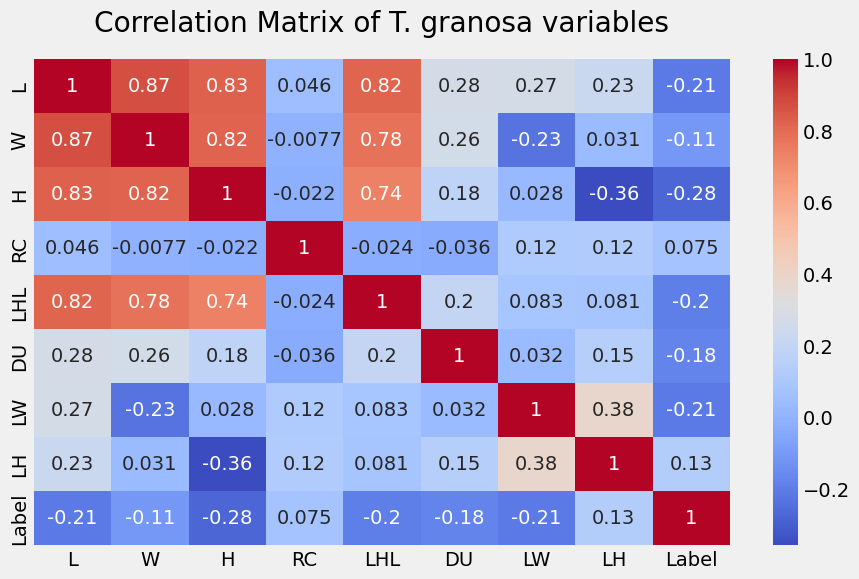

In [23]:
# Define a dictionary to map original column names to codenames
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'Label': 'Label'
}

# Rename the columns of variable_corr using the codenames
variable_corr = variable_corr.rename(columns=codenames)

# Now calculate the correlation and plot the heatmap
corr = variable_corr.corr()
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of T. granosa variables', pad=20)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

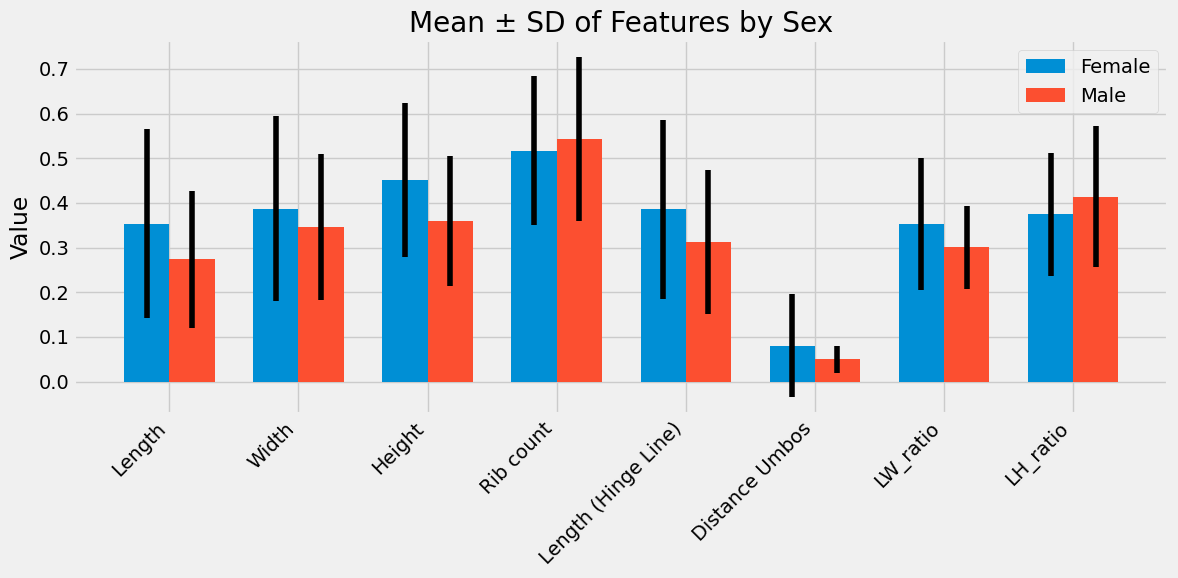

In [27]:
# prompt: Show the mean ± SD for each feature with separate bars for male and female groups.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'litob_combined' DataFrame from the previous code is available

# Calculate mean and standard deviation for each feature, grouped by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])

# Create the plot
plt.figure(figsize=(12, 6))

x = range(len(features))
width = 0.35

for i, sex in enumerate([0, 1]):  # Iterate through female (0) and male (1) groups
    # Accessing 'mean' and 'std' correctly using MultiIndex column names
    means = grouped_data.loc[sex, [('Length', 'mean'), ('Width', 'mean'), ('Height', 'mean'), ('Rib count', 'mean'), ('Length (Hinge Line)', 'mean'), ('Distance Umbos', 'mean'), ('LW_ratio', 'mean'), ('LH_ratio', 'mean')]]  # Access 'mean' using MultiIndex column names
    stds = grouped_data.loc[sex, [('Length', 'std'), ('Width', 'std'), ('Height', 'std'), ('Rib count', 'std'), ('Length (Hinge Line)', 'std'), ('Distance Umbos', 'std'), ('LW_ratio', 'std'), ('LH_ratio', 'std')]]  # Access 'std' using MultiIndex column names

    plt.bar([xi + i * width for xi in x], means, width, yerr=stds, label=f"{'Female' if sex == 0 else 'Male'}")

plt.xticks([xi + width / 2 for xi in x], features, rotation=45, ha="right")
plt.ylabel("Value")
plt.title("Mean ± SD of Features by Sex")
plt.legend()
plt.tight_layout()
plt.show()

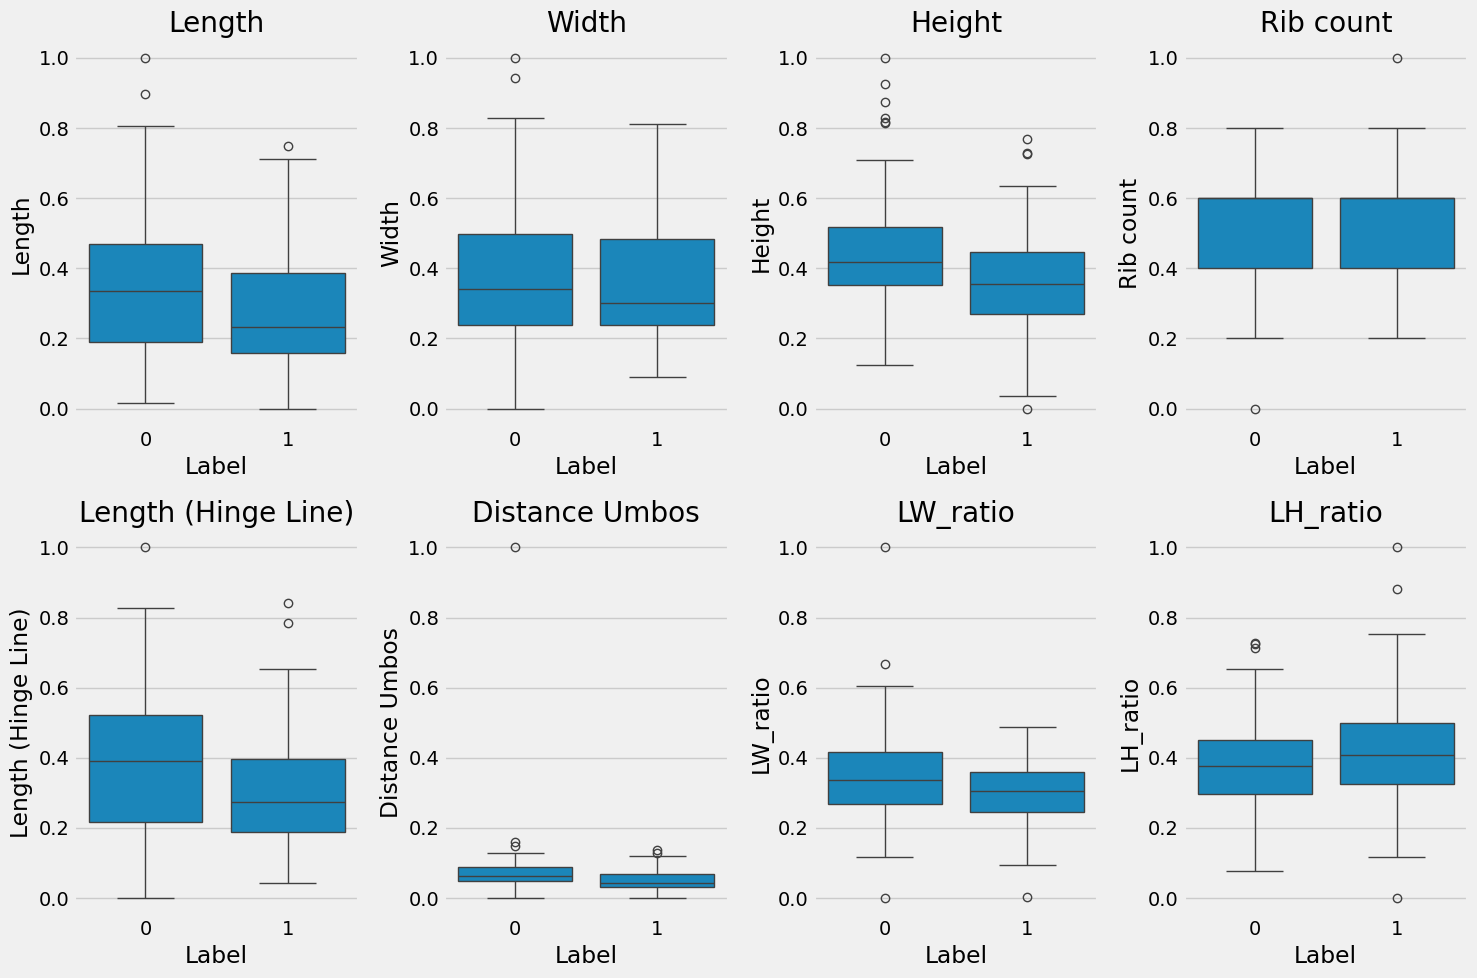

In [28]:
# prompt: Box Plots: Illustrate the distribution of values (min, max, median, quartiles) for each feature, separated by sex.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'litob_combined' DataFrame and 'features' list are defined as in your provided code

plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization

for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)  # Create subplots for each feature
    sns.boxplot(x='Label', y=feature, data=litob_combined)
    plt.title(feature)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()